# Is there a relationship between a person's personality and Cannabis consumption?

According to the National Institute of Drug Abuse the drug usage related cost can reach or even exceed the annual $740 billion dollar in the USA: accidents from driving under the influence, crimes caused by or driven by drugs, healthcare cost, or when people dropout from potential workforce. The deaths caused by drug overdose is steadily increasing every year.

Our purpose of the study is to identify the groups of people who are more likely to become users of a certain drug, so that we can reach them with preventive programs or targeted education that can keep them from becoming drug users.

**[Cannabis](https://adf.org.au/drug-facts/cannabis/#wheel)**

Cannabis is classified as a cannabinoid drug. Other names: marijuana, yarndi, pot, weed, hash, dope, gunja, joint, stick, chronic, cone, choof, mull, 420, dabs, dabbing, BHO.

**How is it used?**
Cannabis can be smoked, eaten or vaporized and comes in different forms (marijuana, hashish, hash oil, concentrates). Cannabis can be prepared into various foods generally called ‘edibles’ and can also come in synthetic form, which may be more harmful than real cannabis.

**Effects of cannabis**
Cannabis affects every individual differently. Even the same person may have a different experience on separate occasions or over the course of their life. Effects are dependent on how much and how often the cannabis is consumed and may also be affected by how the cannabis is consumed (e.g. vaporising a concentrate versus smoking the flower).

- feelings of relaxation and euphoria
- spontaneous laughter and excitement
- increased sociability
- increased appetite
- dry mouth
- memory impairment
- slower reflexes
- bloodshot eyes
- increased heart rate
- mild anxiety and paranoia
- reduced cognitive functioning

Those with a family history of mental illness are more likely to also experience anxiety, depression and psychotic symptoms (delusions, hallucinations and seeing or hearing things that do not exist or are distorted).

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import pickle

import warnings
warnings.filterwarnings("ignore")

# libraries for cleaning and preprocessing data
from sklearn.preprocessing import StandardScaler

# libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

# libraries for evaluating models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from visualizations import *
from modeling import *

%load_ext autoreload
%autoreload 2

## Preprocessing Data

In [2]:
cannabis = pd.read_csv('data/cannabis.csv')
cannabis

,User,Age,Gender,Education,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impusivity,Sensation-seeking
0,0,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,1,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,1,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,1,0,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,1,2,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
5,0,5,0,3,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
6,0,3,1,7,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987
7,0,2,1,1,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593
8,0,2,0,5,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858
9,0,4,1,7,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637


## Modeling

In [3]:
# define feature and target variables
y = cannabis['User']
X = cannabis.drop('User', axis=1)

# train-test split for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=220,
                                                    stratify=y)

In [4]:
# scale data for Logistic Regression, KNN, and SVM
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

scale = StandardScaler()

X_train_scale.loc[:, ['Age', 'Education']] = scale.fit_transform(
    X_train_scale.loc[:, ['Age', 'Education']])
X_test_scale.loc[:, ['Age', 'Education']] = scale.transform(
    X_test_scale.loc[:, ['Age', 'Education']])

### Logistic Regression

In [5]:
grid_log = [{'C': np.logspace(-2, 4, 10),
             'penalty': ['l1', 'l2']}]

gs_log = run_gridsearch_scaled(LogisticRegression, grid_log,
                               X_train_scale, X_test_scale,
                               y_train, y_test, random_state=220)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best params: {'C': 0.046415888336127774, 'penalty': 'l2'}
Train score: 0.798
Test score: 0.804


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished


### Decision Tree

In [6]:
grid_tree = [{'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [2, 3],
              'max_features': [7, 8, 9]}]

gs_tree = run_gridsearch(DecisionTreeClassifier, grid_tree,
                         X_train, X_test,
                         y_train, y_test, random_state=220)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train score: 0.773
Test score: 0.780


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.6s finished


### Random Forest

In [7]:
grid_forest = [{'criterion': ['gini', 'entropy'],
                'n_estimators': [90, 100],
                'max_depth': [6, 7],
                'min_samples_split': [2, 3],
                'min_samples_leaf': [15, 16],
                'max_features': [2, 3, 4]}]

gs_forest = run_gridsearch(RandomForestClassifier, grid_forest,
                           X_train, X_test,
                           y_train, y_test, random_state=220)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.4s


Best params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 100}
Train score: 0.798
Test score: 0.798


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   20.0s finished


### Boosting

#### AdaBoost

In [17]:
grid_ada = {'base_estimator': [DecisionTreeClassifier(criterion='gini', max_depth=4,
                                                      max_features=8, min_samples_leaf=2,
                                                      min_samples_split=2),
                               RandomForestClassifier(criterion='gini', max_depth=7,
                                                      max_features=3, min_samples_leaf=16,
                                                      min_samples_split=2, n_estimators=100)],
            'n_estimators': [1, 5, 10],
            'learning_rate': [0.01, 0.1, 0.5]}

gs_ada = run_gridsearch(AdaBoostClassifier, grid_ada,
                        X_train, X_test,
                        y_train, y_test, random_state=220)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   25.0s finished


Best params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'learning_rate': 0.1, 'n_estimators': 5}
Train score: 0.795
Test score: 0.806


#### Gradient Boost

In [9]:
grid_gb = {'learning_rate': [0.1, 0.05, 0.01],
           'max_depth': [5, 6, 7],
           'min_samples_leaf': [100, 150, 200],
           'max_features': [1.0, 0.3, 0.1]}

gs_gb = run_gridsearch(GradientBoostingClassifier, grid_gb,
                       X_train, X_test,
                       y_train, y_test, random_state=220)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s


Best params: {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 150}
Train score: 0.798
Test score: 0.796


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    7.5s finished


#### XGBoost

In [18]:
grid_boost = {"learning_rate": [0.01, 0.05, 0.1],
              'max_depth': [2, 3, 4],
              'min_child_weight': [15, 16, 17],
              'subsample': [0.2, 0.7, 1],
              'n_estimators': [140, 150, 160]}

gs_boost = run_gridsearch(xgb.XGBClassifier, grid_boost,
                          X_train, X_test,
                          y_train, y_test, random_state=220)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1200 out of 1215 | elapsed:   34.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:   34.7s finished


Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 16, 'n_estimators': 150, 'subsample': 1}
Train score: 0.798
Test score: 0.809


#### LightGBM

In [49]:
grid_lgb = {'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [2, 3, 4],
            'min_child_weight': [15, 16, 17],
            'subsample': [0.2, 0.7, 1],
            'n_estimators': [140, 150, 160]}

gs_lgb = run_gridsearch(lgb.LGBMClassifier, grid_lgb,
                        X_train, X_test,
                        y_train, y_test, random_state=220)

pickle.dump(gs_lgb, open('models/cannabis_boost.sav', 'wb'))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.6s


Best params: {'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 17, 'n_estimators': 160, 'subsample': 0.2}
Train score: 0.794
Test score: 0.817


[Parallel(n_jobs=-1)]: Done 1200 out of 1215 | elapsed:   10.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:   10.7s finished


### KNN

In [11]:
grid_knn = {'n_neighbors': [26, 27, 28]}

gs_knn = run_gridsearch_scaled(KNeighborsClassifier, grid_knn,
                               X_train_scale, X_test_scale,
                               y_train, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'n_neighbors': 27}
Train score: 0.786
Test score: 0.785


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished


### SVM

In [12]:
grid_svm = {'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2, 3, 4]}

gs_svm = run_gridsearch_scaled('SVM', grid_svm,
                               X_train_scale, X_test_scale,
                               y_train, y_test, random_state=220)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    4.6s remaining:    0.6s


Best params: {'C': 1, 'degree': 2, 'kernel': 'linear'}
Train score: 0.794
Test score: 0.798


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    5.3s finished


## Findings

### ROC Curve

We used Receiver Operating Characteristic (ROC) curves and the Area Under the Curve (AUC) scores to compare which classification method performed the best. The ROC curve shows the ratio of True Positive and False Positive rates. The perfect model (red dotted line) would show an AUC of 1 and a ROC curve that looks like an upside-down 'L', because the perfect model would show 100% True Positives. The black dotted line shows the ROC curve of a random guess.

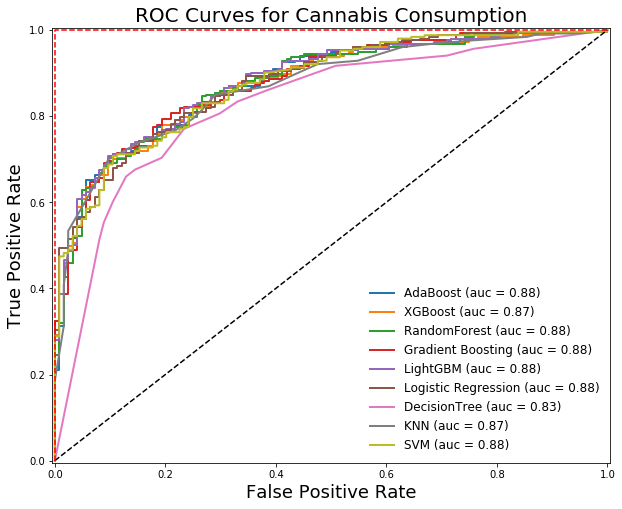

In [47]:
models = [gs_ada, gs_boost, gs_forest, gs_gb, gs_lgb,
          gs_log, gs_tree, gs_knn, gs_svm]

model_names = ['AdaBoost', 'XGBoost', 'RandomForest',
               'Gradient Boosting', 'LightGBM',
               'Logistic Regression', 'DecisionTree',
               'KNN', 'SVM']

plot_roc_curve(models, model_names, X_test, y_test, 'Cannabis', X_test_scale)

The AUC scores of all of the models, except for DecisionTree, were very similar as you can see in the legend. DecisionTree performed the worst out of the eight models above. Because the above graph does not clearly show the differences in models, I created another graph below to show just three graphs (best, middle, and worst performing models).

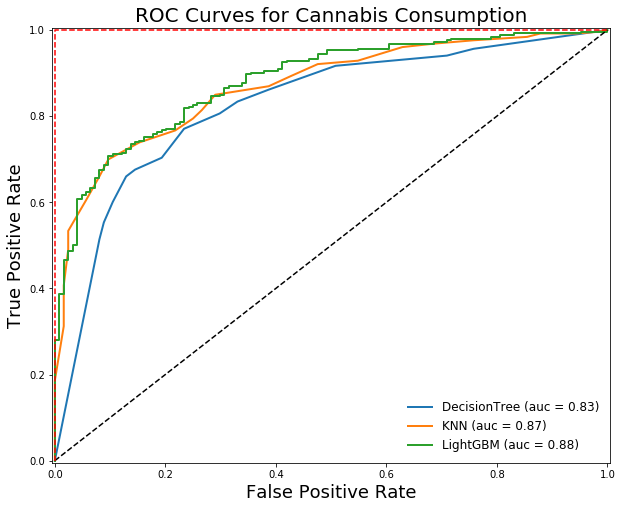

In [48]:
names = ['DecisionTree', 'KNN', 'LightGBM']

plot_roc_curve([gs_tree, gs_knn, gs_lgb],
               names, X_test, y_test,
               'Cannabis', X_test_scale)

plt.savefig('img/cannabis_roc.png', bbox_inches='tight')

### Interpreting LightGBM Results

I chose to focus on the LightGBM model to analyze the accuracy of predictions and which features are most important in predicting Cannabis users.

In [5]:
gs_lgb = pickle.load(open('models/cannabis_boost.sav', 'rb'))

#### Confusion Matrix

The confusion matrix below shows the percent accuracy of predictions. The LightGBM model was 81.7% accurate in predicting whether a person was a user (60%) or a nonuser (21%).

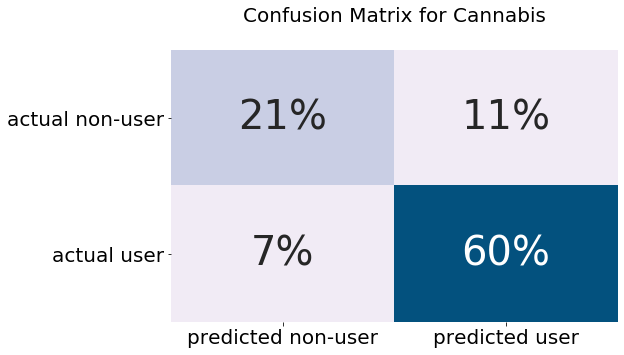

In [8]:
plot_confusion_matrix(y_test, X_test, gs_lgb, 'Cannabis')
plt.savefig('img/cannabis_matrix.png', bbox_inches='tight');

#### Important Features in Predicting Cannabis Users

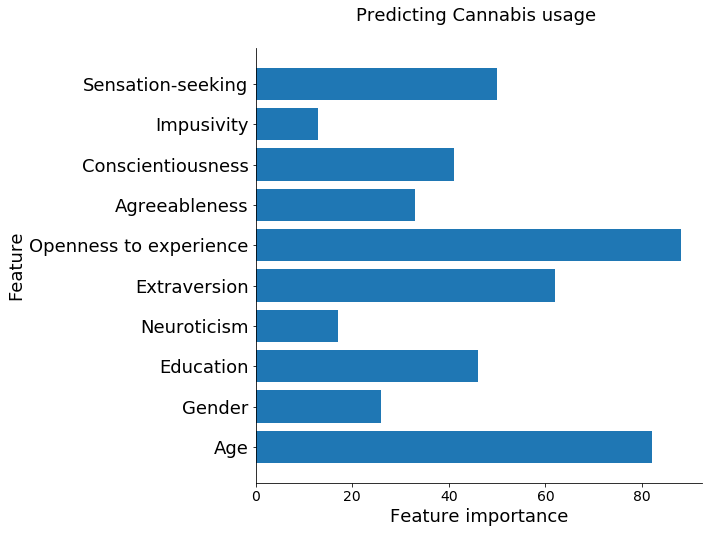

In [7]:
plot_feat_imp(gs_lgb, X_train, 'Cannabis')

## Conclusion

Based on the 9 classification models, their demographics (age, gender, and education level) and their personalities had accuracy levels of 79-82% in predicting Cannabis users. Age and openness to experience were the 2 most influential in predicting Cannabis consumption.